 MATRICE ORIGINALE 
[[-1  2  7]
 [ 9 -1  8]
 [ 2  7 -1]
 [ 4 -1  5]]
MATRICE PREDITE 
[[6.9 2.1 6.8]
 [8.7 1.  8. ]
 [2.  6.8 4.5]
 [4.1 3.2 4.8]]
MATRICE P  0.01, 0
[[0.   1.56]
 [3.36 0.51]
 [0.75 2.62]
 [1.5  0.55]]

--- MATRICE Q  0.01, 0
[[2.68 0.  ]
 [4.89 1.28]
 [1.7  4.48]]

--- MATRICE RECONSTRUITE ---
[[ 0.   2.   7. ]
 [ 9.  17.1  8. ]
 [ 2.   7.  13. ]
 [ 4.   8.   5. ]]

--- MATRICE ORIGINALE (R) ---
[[-1  2  7]
 [ 9 -1  8]
 [ 2  7 -1]
 [ 4 -1  5]]

--- MATRICE P (Utilisateurs) 0.01, 0.1
[[2.48 0.8 ]
 [3.22 0.45]
 [0.35 2.65]
 [1.34 1.28]]

--- MATRICE Q (Objets/Films) 0.01, 0.1
[[2.66 0.39]
 [0.   2.57]
 [2.3  1.36]]

--- MATRICE RECONSTRUITE ---
[[6.9 2.  6.8]
 [8.7 1.2 8. ]
 [2.  6.8 4.4]
 [4.1 3.3 4.8]]

--- MATRICE ORIGINALE (R) ---
[[-1  2  7]
 [ 9 -1  8]
 [ 2  7 -1]
 [ 4 -1  5]]


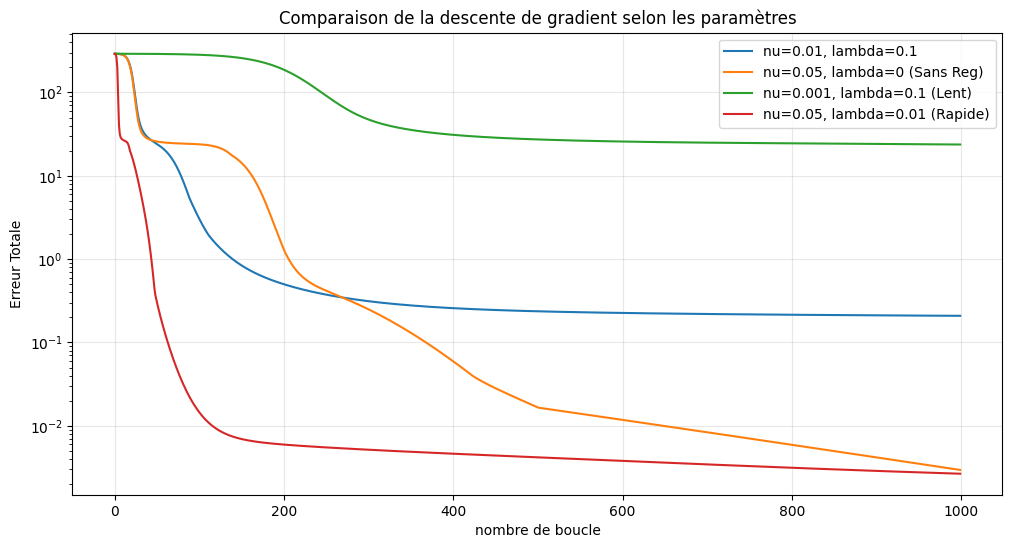

In [63]:
import numpy as np
import matplotlib.pyplot as plt 

# Paramètres et données : 

 
k = 2 # Nb de facteurs latents
entrainement = 1000 # nb d'entrainements

    
R = np.array([
    [ 5., 3., -1.,  3.,  5., -1.,  2.,  4., -1.,  4.],
    [ 4., -1.,  1.,  1.,  4.,  2., -1.,  3.,  2., -1.],
    [ 1.,  1., -1., -1.,  2.,  4.,  5., -1.,  5.,  3.],
    [-1.,  1.,  5.,  5., -1.,  1.,  1.,  2., -1.,  1.],
    [ 2.,  2.,  4.,  4.,  2., -1.,  1., -1.,  1., -1.],
    [-1.,  5.,  2.,  2., -1.,  1.,  1.,  4.,  1.,  4.],
    [ 4., -1.,  1., -1.,  4.,  2., -1.,  3.,  2.,  3.],
    [ 3.,  3., -1.,  3.,  3.,  3.,  3., -1.,  3., -1.],
    [-1.,  1.,  5.,  5.,  1., -1.,  1.,  2.,  1.,  1.],
    [ 5.,  5., -1.,  5.,  5., -1.,  4.,  5., -1.,  5.],
    [ 2., -1.,  4.,  4.,  2.,  1., -1.,  2.,  1.,  1.],
    [ 1.,  1.,  5., -1.,  1., -1.,  1., -1.,  1.,  1.],
    [ 4.,  2., -1.,  2.,  4.,  2.,  2.,  3.,  2.,  3.],
    [-1.,  4.,  1.,  1., -1.,  3.,  4.,  4.,  4.,  4.],
    [ 1.,  1.,  4.,  4.,  1.,  2.,  2., -1.,  2.,  2.]
])


n, m = R.shape


R = np.array([
    [-1,  2,  7],
    [ 9, -1,  8],
    [ 2,  7, -1],
    [ 4, -1,  5]
])

n, m = R.shape



# Création de la liste des notes connues (où R != -1)
connues = []
for u in range(n):
    for i in range(m):
        if R[u][i] != -1:
            connues.append((u, i))




# implémentation de la descente : 

def descente_de_g(nu, lambd):

    # Initialisation de P et Q 
    P = np.random.rand(n, k) * 0.1
    Q = np.random.rand(m, k) * 0.1
    historique = []

    for _ in range(entrainement):
        for u, i in connues:
            #calcul de l'erreur de la prédiction
            prevision = np.dot(P[u], Q[i])
            erreur_ui = R[u][i] - prevision 
            
            # maj de P et Q

            P[u] = np.maximum(0, P[u] + nu * (erreur_ui * Q[i] - lambd * P[u]))
            Q[i] = np.maximum(0, Q[i] + nu * (erreur_ui * P[u] - lambd * Q[i]))


            erreur_totale = 0

        for u, i in connues:

            erreur_totale += (R[u][i] - np.dot(P[u], Q[i].T))**2   #on regarde juste l'erreur quadratique ici

        historique.append(erreur_totale)

    return historique, P, Q




# Affichage des résultats : 



#pour nu = 0.01 et lambda = 0.1 : 

hist, P_final, Q_final = descente_de_g(0.01, 0.1)


R_predite = np.dot(P_final, Q_final.T)
print(" MATRICE ORIGINALE ")
print(R)
print("MATRICE PREDITE ")
print(np.round(R_predite, 1))


#pour nu = 0.01 et lambda = 0 : 

hist, P_final, Q_final = descente_de_g(0.05, 0)

print("MATRICE P  0.01, 0")

print(np.round(P_final, 2))

print("\n--- MATRICE Q  0.01, 0")

print(np.round(Q_final, 2))

R_predite = np.dot(P_final, Q_final.T)
print("\n--- MATRICE RECONSTRUITE ---")
print(np.round(R_predite, 1))
print("\n--- MATRICE ORIGINALE (R) ---")
print(R)



#pour nu = 0.01 et lambda = 0.1 : 

hist, P_final, Q_final = descente_de_g(0.01, 0.1)

print("\n--- MATRICE P (Utilisateurs) 0.01, 0.1")

print(np.round(P_final, 2))

print("\n--- MATRICE Q (Objets/Films) 0.01, 0.1")

print(np.round(Q_final, 2))


R_predite = np.dot(P_final, Q_final.T)
print("\n--- MATRICE RECONSTRUITE ---")
print(np.round(R_predite, 1))
print("\n--- MATRICE ORIGINALE (R) ---")
print(R)





# AFFICHAGE GRAPHIQUE :


plt.figure(figsize=(12, 6))

# Test 1 : Avec régularisation (ton réglage de base)
plt.plot(descente_de_g(0.01, 0.1)[0], label="nu=0.01, lambda=0.1")

# Test 2 : Sans régularisation (on voit l'instabilité)
plt.plot(descente_de_g(0.01, 0.0)[0], label="nu=0.05, lambda=0 (Sans Reg)")

# Test 3 : Nu très petit (descente plus lente mais plus stable)
plt.plot(descente_de_g(0.001, 0.1)[0], label="nu=0.001, lambda=0.1 (Lent)")

# Test 4 : Nu trop grand (attention, ça peut sortir du graphique !)
plt.plot(descente_de_g(0.05, 0.01)[0], label="nu=0.05, lambda=0.01 (Rapide)")

plt.title("Comparaison de la descente de gradient selon les paramètres")
plt.xlabel("nombre de boucle")
plt.ylabel("Erreur Totale")
plt.yscale('log') # Optionnel : échelle logarithmique si les écarts sont énormes
plt.legend() # Affiche les noms des courbes
plt.grid(True, alpha=0.3)
plt.show()






